In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score, confusion_matrix
import sklearn.metrics as metrics

Dataset Source: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)


In [2]:
data = pd.read_csv('Cancer_Data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data = data.drop(columns = data.iloc[:,12:,].columns)
data = data.drop(columns = 'id')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [9]:
data.isna().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

This dataset has 569 obervations of 11 variables (after deleting non-target variables). The outcome variable of this dataset is 'diagnosis' and it has two unique values: Malignant and Benign.

In [4]:
# changing values from M or B to 0 and 1
for i in range(len(data['diagnosis'])):
    if data['diagnosis'][i] == 'M':
        data['diagnosis'][i] = 1
    if data['diagnosis'][i] == 'B':
        data['diagnosis'][i] = 0
      

# Print the updated DataFrame
data['diagnosis'].unique()

<ipython-input-4-cc990a30c122>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-4-cc990a30c122>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([1, 0], dtype=object)

# **EXPLORATORY ANALYSIS**

In [ ]:
pd.DataFrame(data.diagnosis.value_counts())

,diagnosis
0,357
1,212


In the medical field, cancer cells are classified as either Malignant or Benign. A Malignant cancer cell is dangerous and at risk of spreading. A Benign cancer cell is one that is not harmful and are not at risk of spreading to other parts of the body. 


***In this dataset there are 357 benign cancer cells and 212 malignant cancer cells.***

<Axes: >

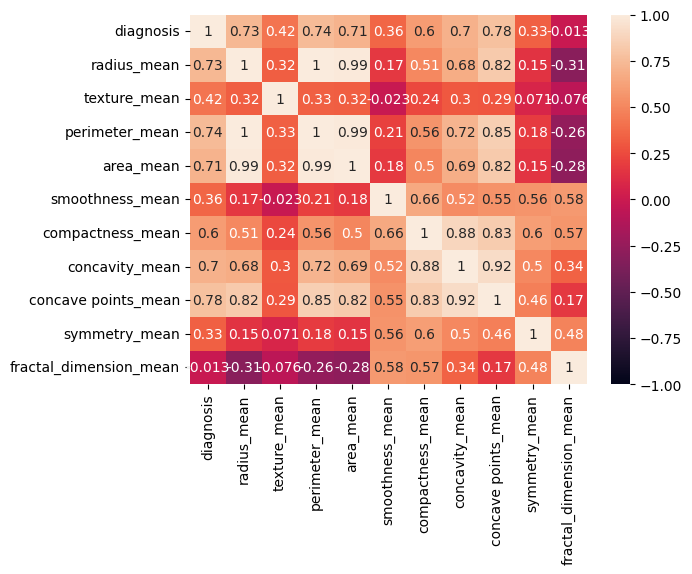

In [ ]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

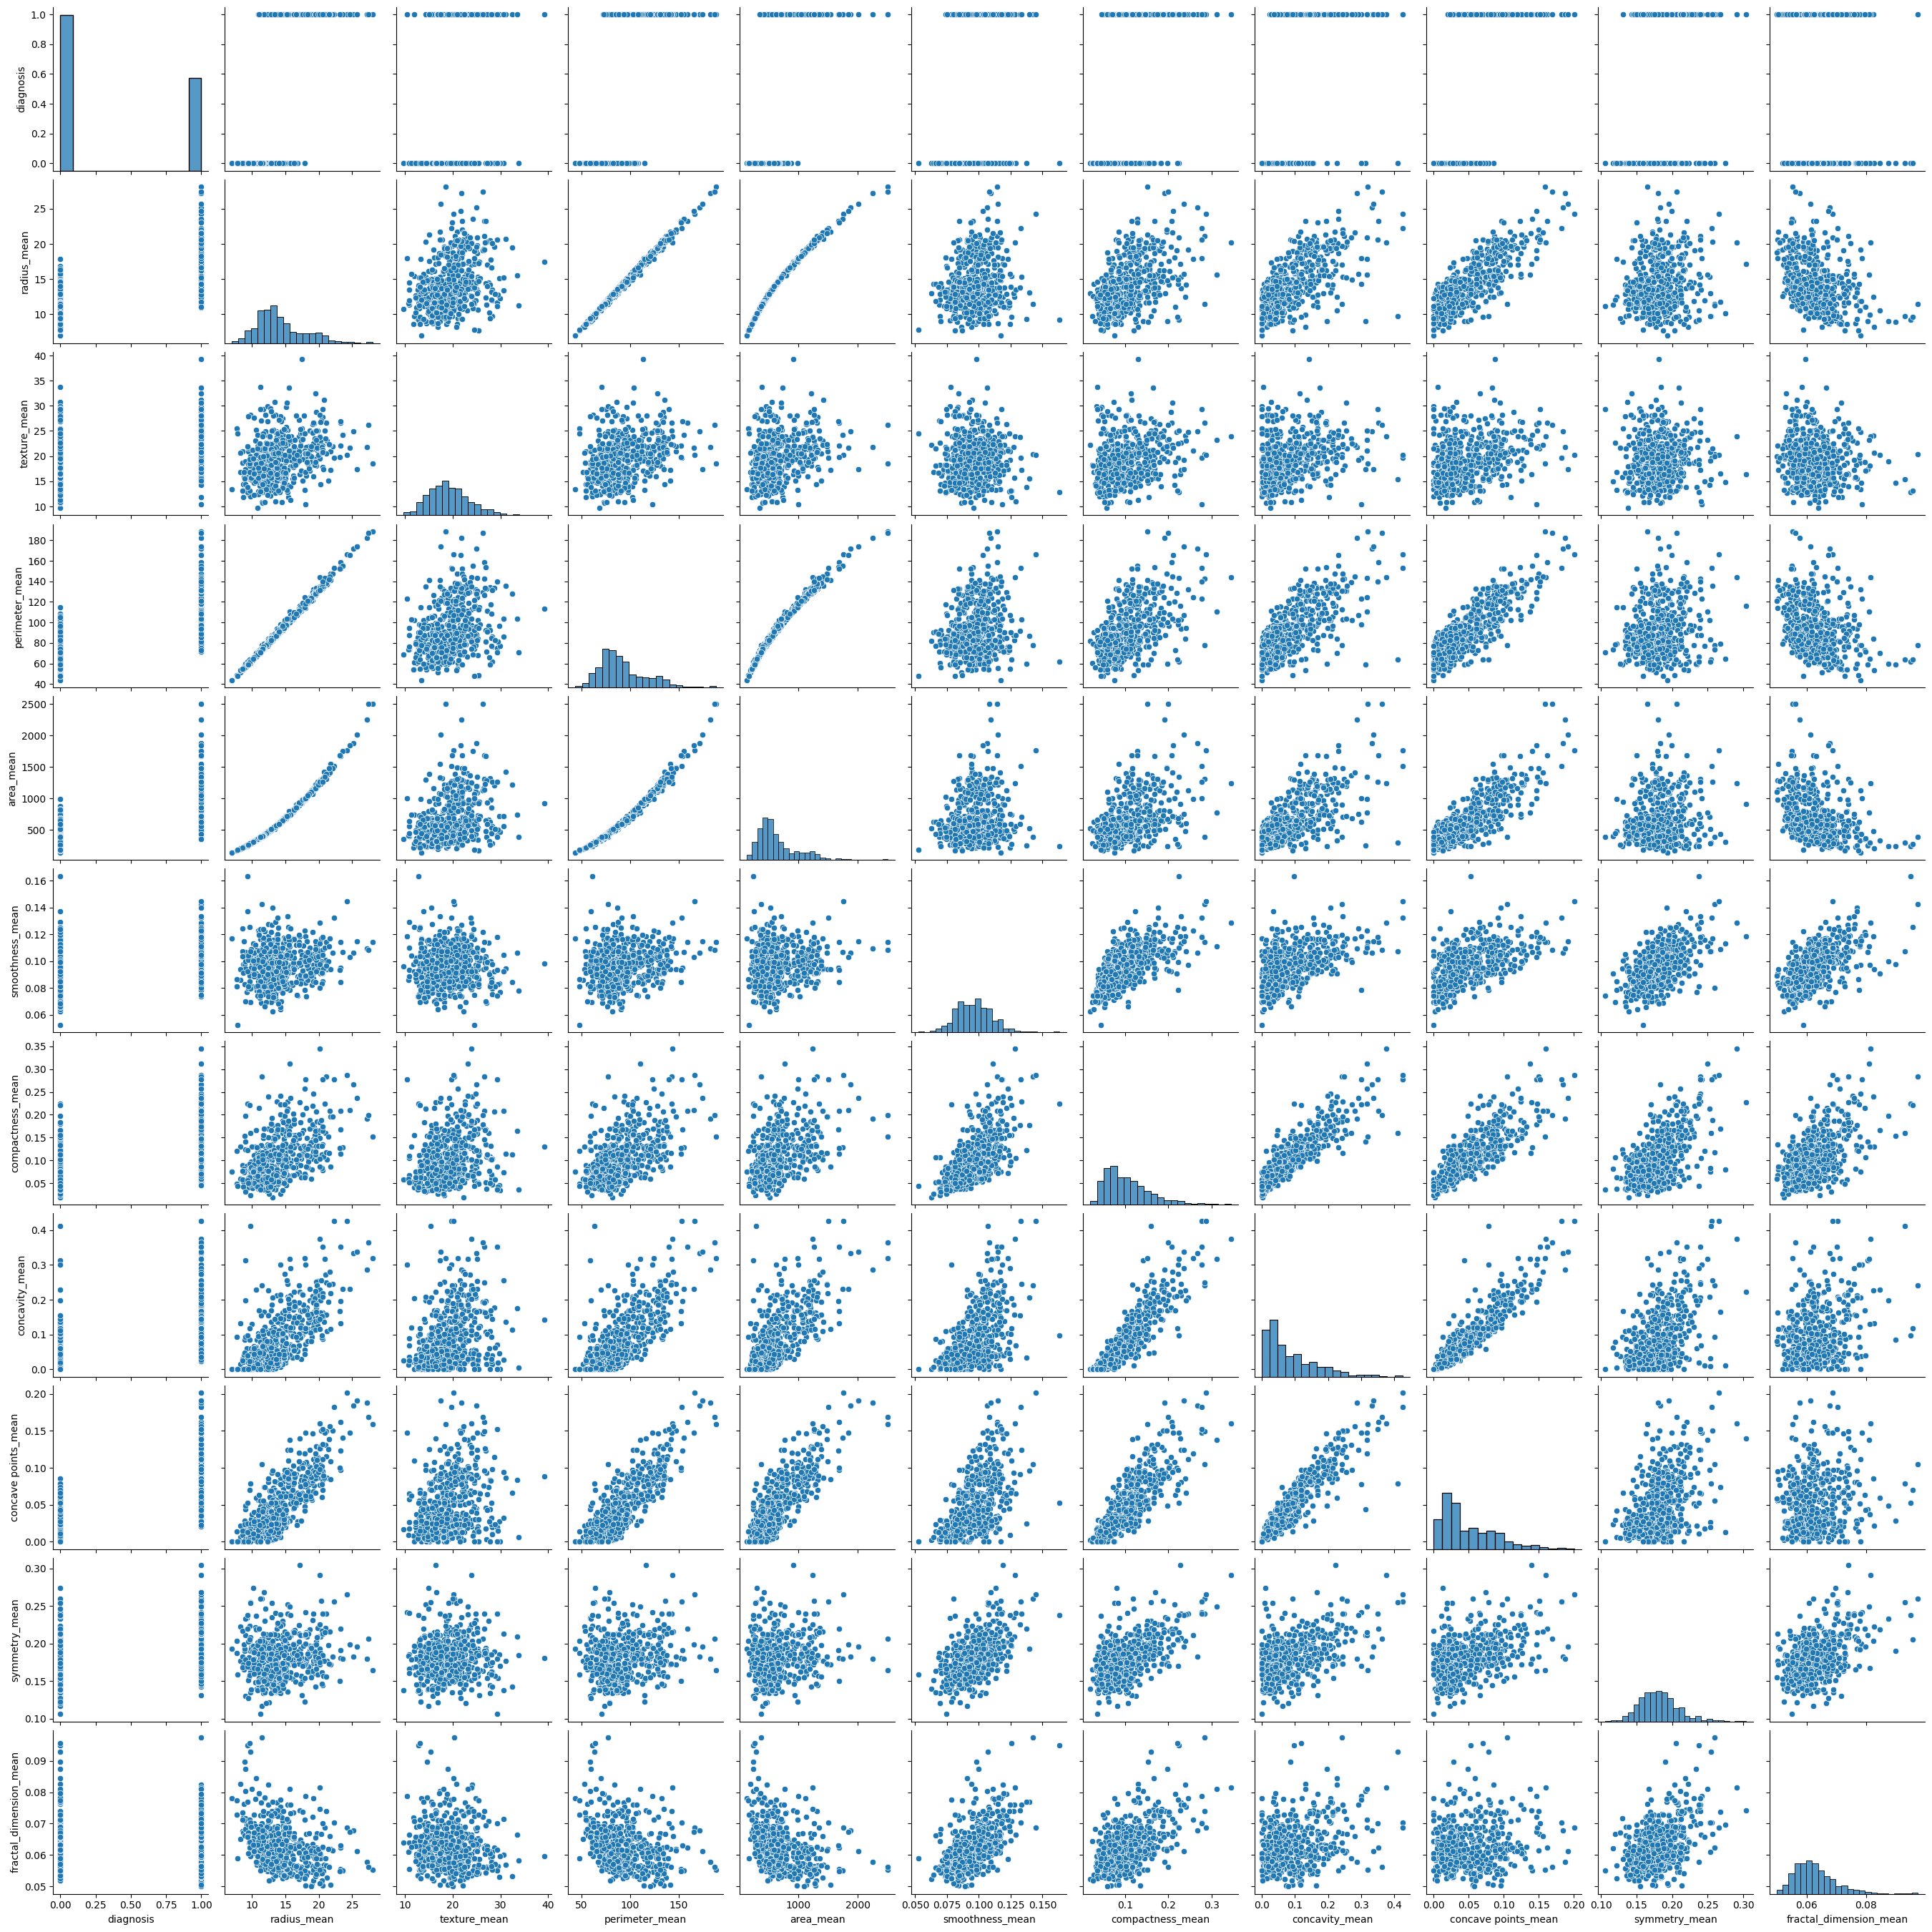

In [ ]:
sns.pairplot(data)

# **LASSO MODEL**


In [12]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = data.iloc[:,1:,]
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

# Z Score
z = StandardScaler()
X_train = z.fit_transform(X_train)
X_test = z.transform(X_test)

# Create and fit the Lasso model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter to control the regularization strength
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Evaluate the model
accuracy = lasso.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5132484860536832


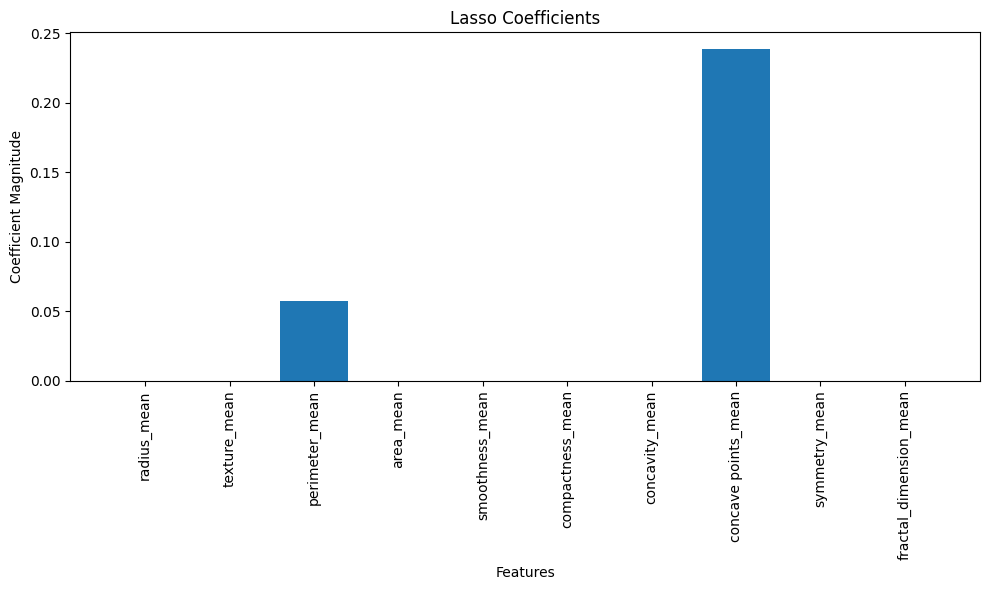

In [15]:
coefficients = lasso.coef_
feature_names = X.columns

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Lasso Coefficients')
plt.tight_layout()
plt.show()

# **LOGISTIC REGRESSION MODEL**

In [18]:
X = data.iloc[:,1:,]
y = data['diagnosis'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

# Z Score
z = StandardScaler()
X_train = z.fit_transform(X_train)
X_test = z.transform(X_test)

# Creating and Fitting Model
logit = LogisticRegression()
logit.fit(X_train, y_train)



LogisticRegression()

In [62]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 398 entries, 108 to 379
Series name: diagnosis
Non-Null Count  Dtype 
--------------  ----- 
398 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [19]:
# Viewing Coefficients
coef = pd.DataFrame({"coefNames": data.iloc[:,1:,].columns, 
                     "logOdds": logit.coef_[0], 
                     "Odds": np.exp(logit.coef_[0])})


print(coef)

# Printing the largest coefficient
print("The variable", coef['coefNames'][coef['Odds'] == (coef['Odds'].max())].values[0],
      "has the largest odds coefficent at: ", 
      coef['Odds'].max())

print("The variable", coef['coefNames'][coef['Odds'] == (coef['Odds'].min())].values[0], "has the smallest odds coefficient at: ", coef['Odds'].min())



                coefNames   logOdds      Odds
0             radius_mean  0.951947  2.590748
1            texture_mean  1.246611  3.478534
2          perimeter_mean  0.904541  2.470797
3               area_mean  1.231198  3.425329
4         smoothness_mean  0.936565  2.551203
5        compactness_mean -0.090131  0.913812
6          concavity_mean  0.804165  2.234829
7     concave points_mean  1.350204  3.858213
8           symmetry_mean  0.591314  1.806360
9  fractal_dimension_mean -0.490742  0.612172
The variable concave points_mean has the largest odds coefficent at:  3.8582127624361156
The variable fractal_dimension_mean has the smallest odds coefficient at:  0.6121721099533731


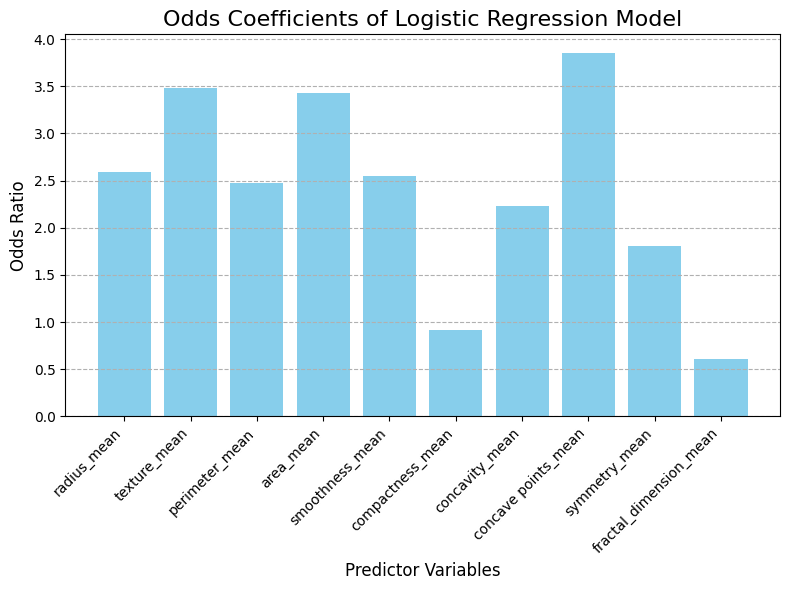

In [21]:
# Create bar graph
plt.figure(figsize=(8, 6))
plt.bar(data.iloc[:,1:,].columns, np.exp(logit.coef_[0]), color='skyblue')

# Visualizing Coefficients
plt.title('Odds Coefficients of Logistic Regression Model', fontsize=16)
plt.xlabel('Predictor Variables', fontsize=12)
plt.ylabel('Odds Ratio', fontsize=12)
plt.grid(axis='y', linestyle='--')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.tight_layout()
plt.show()

In [65]:
# Creating Predictions 
train_preds = logit.predict(X_train)
test_preds = logit.predict(X_test)

# Computing Metrics
print("TRAIN Acc: ", accuracy_score(y_train, train_preds))
print("TEST Acc: ", accuracy_score(y_test, test_preds))

TRAIN Acc:  0.9472361809045227
TEST Acc:  0.9473684210526315


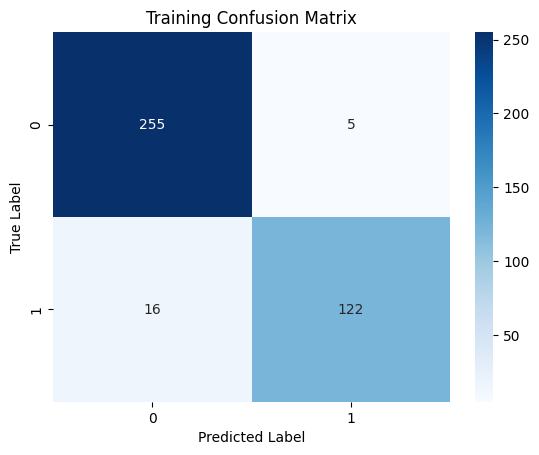

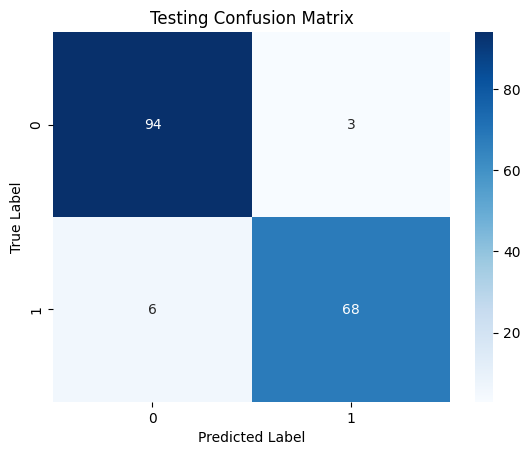

In [66]:
# Confusion Matrix
train_cm = confusion_matrix(y_train, train_preds)
test_cm = confusion_matrix(y_test, test_preds)

# Plot Training confusion matrix
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g')
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot testing confusion matrix
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **KNN CLUSTERING MODEL (Area vs. Symmetry)**

In [67]:
%%capture

predictors_knn = ['area_mean', 'symmetry_mean']
X1 = data[predictors_knn]
y = data['diagnosis'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30)

# Scaling
z1 = StandardScaler()
X_train = z1.fit_transform(X_train)
X_test = z1.transform(X_test)

# Creating Model
knn = KNeighborsClassifier()

# Determining Hyperparameters
ks = {"n_neighbors": range(1, 10)}

grid = GridSearchCV(knn, ks, scoring='accuracy', cv=5, refit=True, error_score = 'raise')
grid.fit(X_train, y_train)
best_n_neighbors = grid.best_estimator_.get_params()["n_neighbors"]

# Fitting Model
grid.fit(X_train, y_train)

# Creating Predictions based on our model
train_preds1 = grid.predict(X_train)
test_preds1 = grid.predict(X_test)


In [68]:
print("TRAIN Acc: ", accuracy_score(y_train, train_preds1))
print("TEST Acc: ", accuracy_score(y_test, test_preds1))

TRAIN Acc:  0.9246231155778895
TEST Acc:  0.8713450292397661


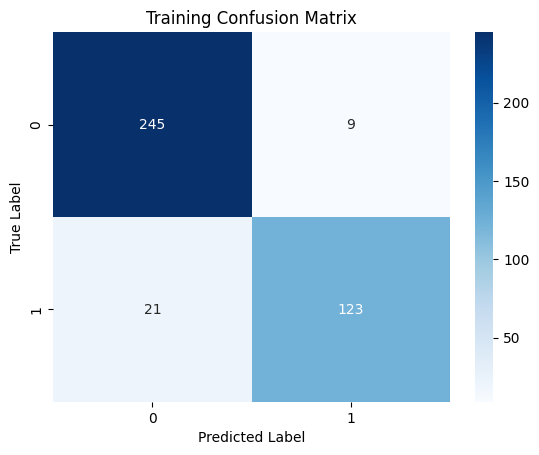

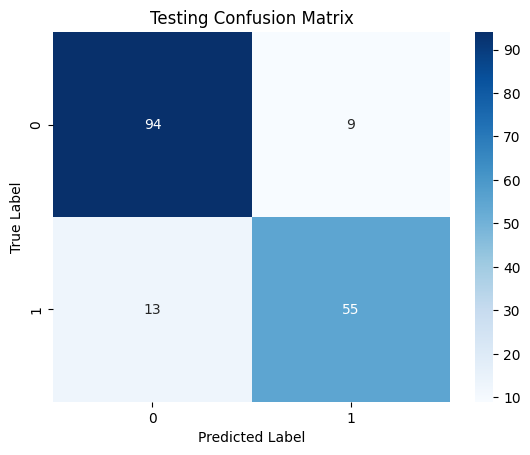

In [69]:
# Confusion Matrix
train_cm = confusion_matrix(y_train, train_preds1)
test_cm = confusion_matrix(y_test, test_preds1)

# Plot Training confusion matrix
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g')
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot testing confusion matrix
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **KMEANS CLUSTERING MODEL (Area vs. Symmetry)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10

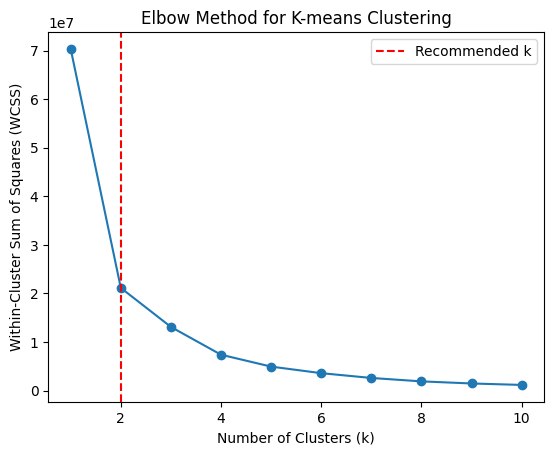

In [52]:
# Predictors, X Y, and TTS
predictors_km = ['area_mean', 'symmetry_mean']

X1 = data[predictors_knn]


# Scaling
z1 = StandardScaler()
z1.fit_transform(X1)
z1.transform(X1)

wcss = []
max_k = 10
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for K-means Clustering')

recommended_k = 2  # Example: Assuming 3 clusters as the recommended choice
plt.axvline(recommended_k, color='r', linestyle='--', label='Recommended k')
plt.legend()
plt.show()



In [51]:
# Creating Model
km = KMeans(n_clusters = 2)

# Fitting Model
km.fit(X1)

# Creating Predictions for our model
membership_km = km.predict(X1)
X1["km_membership"] = membership_km

# Evaluate model
print("Silhouette Score: ", silhouette_score(X1, membership_km))

Silhouette Score:  0.6998054825977144


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
<ipython-input-51-56661e5ade0c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


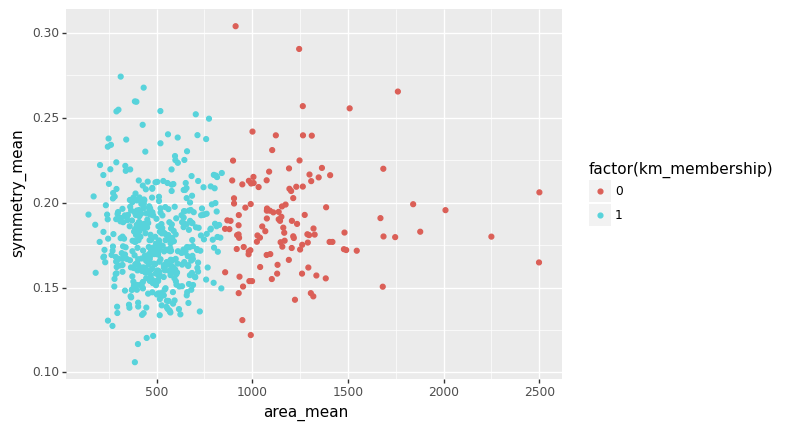

<ggplot: (8778284460852)>

In [41]:
# Visualize
(ggplot(X1, aes(x = 'area_mean', y = 'symmetry_mean', color = 'factor(km_membership)')) + geom_point())

# **HIERARCHICAL CLUSTERING MODEL (Area vs. Symmetry)**


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead


{'icoord': [[5.0, 5.0, 15.0, 15.0], [65.0, 65.0, 75.0, 75.0], [55.0, 55.0, 70.0, 70.0], [85.0, 85.0, 95.0, 95.0], [125.0, 125.0, 135.0, 135.0], [145.0, 145.0, 155.0, 155.0], [130.0, 130.0, 150.0, 150.0], [115.0, 115.0, 140.0, 140.0], [105.0, 105.0, 127.5, 127.5], [175.0, 175.0, 185.0, 185.0], [165.0, 165.0, 180.0, 180.0], [215.0, 215.0, 225.0, 225.0], [245.0, 245.0, 255.0, 255.0], [235.0, 235.0, 250.0, 250.0], [220.0, 220.0, 242.5, 242.5], [275.0, 275.0, 285.0, 285.0], [265.0, 265.0, 280.0, 280.0], [315.0, 315.0, 325.0, 325.0], [305.0, 305.0, 320.0, 320.0], [295.0, 295.0, 312.5, 312.5], [272.5, 272.5, 303.75, 303.75], [231.25, 231.25, 288.125, 288.125], [205.0, 205.0, 259.6875, 259.6875], [195.0, 195.0, 232.34375, 232.34375], [172.5, 172.5, 213.671875, 213.671875], [355.0, 355.0, 365.0, 365.0], [345.0, 345.0, 360.0, 360.0], [335.0, 335.0, 352.5, 352.5], [193.0859375, 193.0859375, 343.75, 343.75], [116.25, 116.25, 268.41796875, 268.41796875], [375.0, 375.0, 385.0, 385.0], [395.0, 395.0,

<ipython-input-183-80744d66c90b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


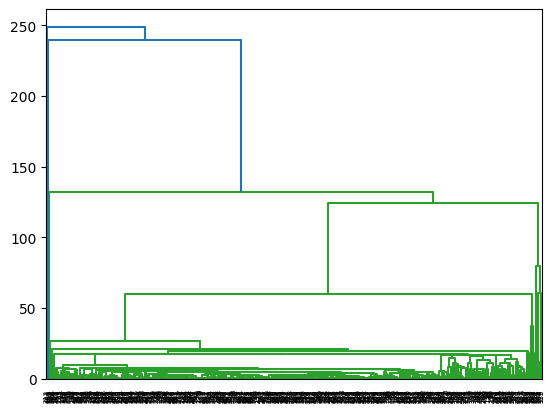

In [ ]:
predictors_knn = ['area_mean', 'symmetry_mean']

X1 = data[predictors_knn]
y = data['diagnosis']


# Scaling
z1 = StandardScaler()
z1.fit_transform(X1)
z1.transform(X1)

# Creating the Model
hac = AgglomerativeClustering(affinity = "euclidean",
                              linkage ='single',
                              n_clusters = 2)

# Fitting Model
hac.fit(X1)

# Dendrogram
dendro = sch.dendrogram(sch.linkage(X1, method = 'single'))
print(dendro)

# Silhouette Score
hac_membership = hac.labels_
X1['hac_membership'] = hac_membership



In [ ]:
print("Silhouette Score: ", silhouette_score(X1, hac_membership))

Silhouette Score:  0.7817824321922809


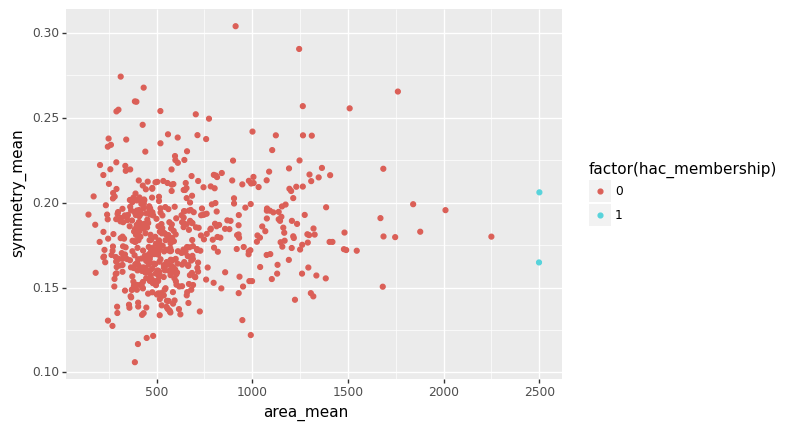

<ggplot: (8781062876320)>

In [ ]:
# Visualize
(ggplot(X1, aes(x = 'area_mean', y = 'symmetry_mean', color = 'factor(hac_membership)')) + geom_point())

# **NEURAL NETWORK**

In [ ]:
# flattening inputs
# dummy_input = torch.randn(1, 3, 224, 224)
#         pool1_out = get_pooling_output_dim(x1, dummy_input)
#         pool2_out = get_pooling_output_dim(x2, torch.randn(1, x1, pool1_out, pool1_out))
#         flattened_dim = x2 * get_pooling_output_dim(x2, torch.randn(1, x1, pool1_out, pool1_out)) ** 2

In [10]:
data.shape

(569, 11)

In [5]:
# Train Test Split
X = data.drop('diagnosis', axis = 1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
class CancerDataset(Dataset):
    def __init__(self, data):
        self.features = data.drop('diagnosis', axis=1).values
        self.labels = data['diagnosis'].values
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        x = torch.Tensor(self.features[index])
        y = torch.Tensor([self.labels[index]])
        return x, y

# Running data through class
dataset = CancerDataset(data)

In [7]:
# CancerDataset Instance for train and test set
train_dataset = CancerDataset(pd.concat([X_train, y_train], axis=1))
test_dataset = CancerDataset(pd.concat([X_test, y_test], axis=1))

In [13]:
class NatesNet(torch.nn.Module):
    def __init__(self, input_size):
        super(NatesNet, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, 16)
        self.fc2 = torch.nn.Linear(16, 8)
        self.fc3 = torch.nn.Linear(8, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = torch.nn.ReLU()(x)
        x = self.fc2(x)
        x = torch.nn.ReLU()(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

    def predict(self, x):
        self.eval()
      
        with torch.no_grad():
            outputs = self.forward(x)
            _, predicted = torch.max(outputs.data, 1)
        
        return predicted

# instantiate the model
input_size = X.shape[1]  # Number of predictor variables
model = NatesNet(input_size)

# Define Loss Function and Criterion
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Set up data loader
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training the Model
num_epochs = 2000
losses = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_dataloader)
    losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/2000, Loss: 3.5264
Epoch 2/2000, Loss: 2.0996
Epoch 3/2000, Loss: 0.9054
Epoch 4/2000, Loss: 0.5870
Epoch 5/2000, Loss: 0.5678
Epoch 6/2000, Loss: 0.5366
Epoch 7/2000, Loss: 0.5297
Epoch 8/2000, Loss: 0.5274
Epoch 9/2000, Loss: 0.5171
Epoch 10/2000, Loss: 0.5078
Epoch 11/2000, Loss: 0.5023
Epoch 12/2000, Loss: 0.4980
Epoch 13/2000, Loss: 0.4892
Epoch 14/2000, Loss: 0.4853
Epoch 15/2000, Loss: 0.4789
Epoch 16/2000, Loss: 0.4719
Epoch 17/2000, Loss: 0.4688
Epoch 18/2000, Loss: 0.4624
Epoch 19/2000, Loss: 0.4571
Epoch 20/2000, Loss: 0.4453
Epoch 21/2000, Loss: 0.4422
Epoch 22/2000, Loss: 0.4446
Epoch 23/2000, Loss: 0.4334
Epoch 24/2000, Loss: 0.4295
Epoch 25/2000, Loss: 0.4204
Epoch 26/2000, Loss: 0.4162
Epoch 27/2000, Loss: 0.4086
Epoch 28/2000, Loss: 0.4115
Epoch 29/2000, Loss: 0.3998
Epoch 30/2000, Loss: 0.4048
Epoch 31/2000, Loss: 0.3999
Epoch 32/2000, Loss: 0.3970
Epoch 33/2000, Loss: 0.3879
Epoch 34/2000, Loss: 0.3813
Epoch 35/2000, Loss: 0.3781
Epoch 36/2000, Loss: 0.3846
E

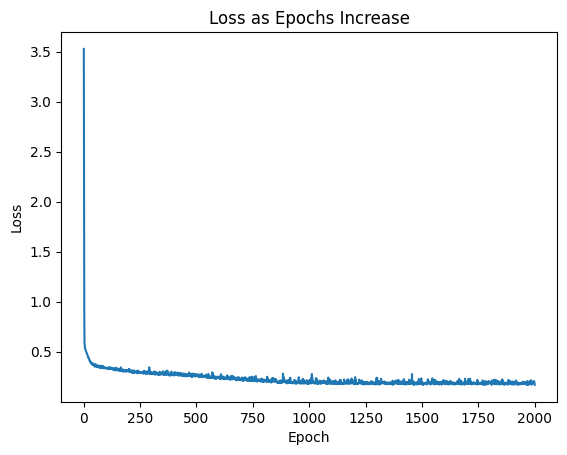

In [14]:
# Loss as epochs increase
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss as Epochs Increase')
plt.show()

In [37]:
# evaluate the model on the testing set
model.eval()  

with torch.no_grad():
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    
    test_loss = 0.0
    test_correct = 0
    test_total = 0
    
    train_predictions = []
    train_targets = []
    
    test_predictions = []
    test_targets = []

    # Evaluate on training data
    for inputs, labels in train_dataloader:
        train_outputs = model(inputs)
        loss = criterion(train_outputs, labels)
        
        train_loss += loss.item()
        train_total += labels.size(0)
        train_correct += (train_outputs.round() == labels).sum().item()

        train_predictions.extend(train_outputs.round().tolist())
        train_targets.extend(labels.tolist())
    
    train_accuracy = train_correct / train_total
    train_loss /= len(train_dataloader)
    
    # Evaluate on testing data
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    for inputs, labels in test_dataloader:
        test_outputs = model(inputs)
        loss = criterion(test_outputs, labels)
        
        test_loss += loss.item()
        test_total += labels.size(0)
        test_correct += (test_outputs.round() == labels).sum().item()

        test_predictions.extend(test_outputs.round().tolist())
        test_targets.extend(labels.tolist())
    
    test_accuracy = test_correct / test_total
    test_loss /= len(test_dataloader)
    
    print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy*100:.2f}%")
    print(f"Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy*100:.2f}%")

Training Loss: 0.1799, Training Accuracy: 91.96%
Testing Loss: 0.1276, Testing Accuracy: 94.74%


Sensitivity (Training): 0.8926174496644296
Specificity (Training): 0.9357429718875502


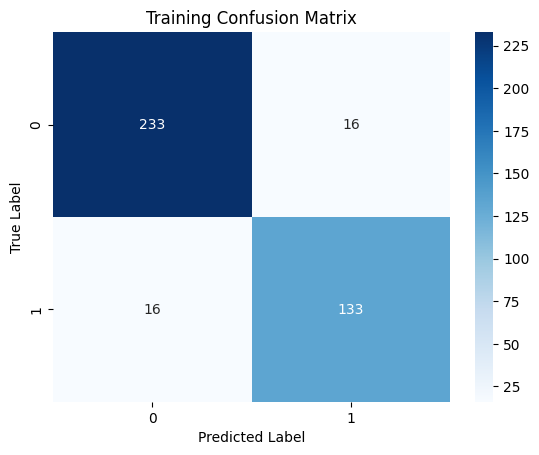

Sensitivity (Testing): 0.9523809523809523
Specificity (Testing): 0.9444444444444444


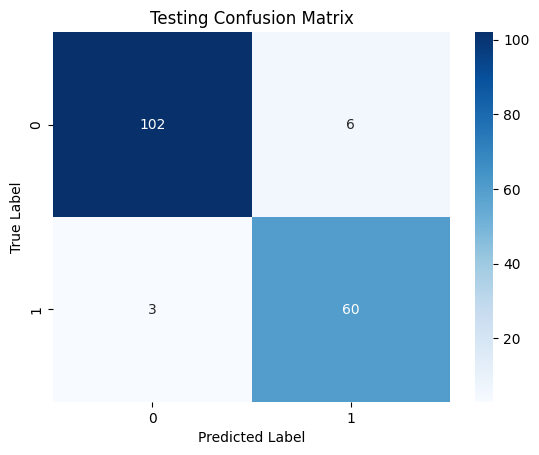

In [42]:
# Confusion Matrix
train_cm = confusion_matrix(train_targets, train_predictions)
test_cm = confusion_matrix(test_targets, test_predictions)

# Extract values from the confusion matrices
tn_train, fp_train, fn_train, tp_train = train_cm.ravel()
tn_test, fp_test, fn_test, tp_test = test_cm.ravel()


# Calculate sensitivity and specificity for training data
train_sensitivity = tp_train / (tp_train + fn_train)
train_specificity = tn_train / (tn_train + fp_train)
# Training Specificity and Sensitivity
print("Sensitivity (Training):", train_sensitivity)
print("Specificity (Training):", train_specificity)
# Plot Training confusion matrix
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g')
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Calculate sensitivity and specificity for testing data
test_sensitivity = tp_test / (tp_test + fn_test)
test_specificity = tn_test / (tn_test + fp_test)
# Testing Specificity and Sensitivity
print("Sensitivity (Testing):", test_sensitivity)
print("Specificity (Testing):", test_specificity)
# Plot testing confusion matrix
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()